In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='/content/drive/MyDrive/Генерация помощи/out.csv'.replace('\t', ' ')
data = pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18943 entries, 0 to 18942
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               18943 non-null  int64  
 1   Source                                   18943 non-null  object 
 2   Статус экспорта                          18943 non-null  object 
 3   Original Line                            18943 non-null  object 
 4   Original Equipment                       18943 non-null  object 
 5   Оригинальная категория                   18943 non-null  object 
 6   Оригинальная подкатегория                18943 non-null  object 
 7   Original Sub Category (Full Path)        18943 non-null  object 
 8   Original Sub Category (Minor Stops)      18943 non-null  object 
 9   Оригинальная причина                     18943 non-null  object 
 10  Original Reason (Full Path)              18943

In [ ]:
data['Original Equipment'].value_counts()

Влф№3                                   4454
Влф№1                                   4028
Влф№2                                   3393
Кнвр под- ый "ГСЬ"-1 (Inln)             1539
Инлн пдча                               1536
Кнвр под- ый "ГСЬ"-2                     504
Фдр                                      422
Сткр                                     421
Кнвры Bsch 3эт                           354
ND деп-тор                               346
РЛЛ Схар                                 239
CFA6                                     237
Вольф№2                                  235
Инлайн подача                            191
Конвейер подъемный "ГУСЬ"-1 (Inline)     187
Вольф№3                                  161
Вольф№1                                  127
РЛЛ мсло                                 121
CFA2                                     111
Автгрв + Вар клнка                        96
Avtgrv +Вар аппрт BSCH#2                  76
Сборн. кнвр (БШ)                          68
Стакер    

In [ ]:
mask1 = data['Original Equipment'] == 'Влф№3'
mask2 = data['Original Equipment'] == 'Вольф№3'
mask3 = data['Оригинальная категория'] == 'Незапланированные простои'
data3 = data[(mask1 | mask2) & mask3]

In [ ]:
data.head()

,Unnamed: 0,Source,Статус экспорта,Original Line,Original Equipment,Оригинальная категория,Оригинальная подкатегория,Original Sub Category (Full Path),Original Sub Category (Minor Stops),Оригинальная причина,...,Bottleneck Duration Hours,Номинальная скорость,Nominal Speed Line UOM,Microstops,Итого,ru-RUTotal by Root Cause,Комментарий,Создано,Modified By,current_date
0,0,OPC,Not Sent,GM,Влф№2,Не занято,Нет плана,"Нет плана,GM_ND",Нет плана,1000-Влф Не занято. Влф ожидает,...,0.0,15226.0,15226.0,0.0,88.0,0.0,NaN,///\RUPERDMOSrv02,///\RUPERDMOSrv02,01.03.2023
1,1,OPC,Not Sent,RLL,"Кнвр под- ый ""ГСЬ""-1 (Inln)",Не занято,Нет плана,"Нет плана,GM_ND",Нет плана,1000-Инлайн Не занято. Ожидание готовности Ямато,...,0.0,1522.6,1522.6,0.0,211.0,0.0,NaN,///\RUPERDMOSrv02,///\RUPERDMOSrv02,01.03.2023
2,2,OPC,Not Sent,GM,Инлн пдча,Не занято,Нет плана,"Нет плана,GM_ND",Нет плана,1000-Инлайн Не занято. Ожидание готовности Ямато,...,0.0,15226.0,15226.0,0.0,211.0,0.0,NaN,///\RUPERDMOSrv02,///\RUPERDMOSrv02,01.03.2023
3,3,OPC,Not Sent,GM,Влф№1,Не занято,Нет плана,"Нет плана,GM_ND",Нет плана,1000-Влф Не занято. Влф ожидает,...,0.0,15226.0,15226.0,0.0,57.0,0.0,NaN,///\RUPERDMOSrv02,///\RUPERDMOSrv02,01.03.2023
4,4,OPC,Not Sent,GM,Инлн пдча,Не занято,Нет плана,"Нет плана,GM_ND",Нет плана,1000-Инлайн Не занято. Ожидание готовности Ямато,...,0.0,15226.0,15226.0,0.0,211.0,0.0,NaN,///\RUPERDMOSrv02,///\RUPERDMOSrv02,01.03.2023


In [ ]:
data3['Комментарий'].value_counts()
data3= data3.fillna({'Комментарий':'Нет комментария'})

In [ ]:
data3['Комментарий'] = data3['Комментарий'].apply(lambda x: x.capitalize())

In [ ]:
data3['Комментарий'] = data3['Комментарий'].apply(lambda x: 'Чистка спаивателей' if x.startswith('Чистка спаи') else x)

In [ ]:
pop_problems = data3['Комментарий'].value_counts().nlargest(30).index.tolist()
pop_problems.remove('.')
pop_problems.remove(',')

In [ ]:
data3['Комментарий'] = data3['Комментарий'].apply(lambda x: x if x in pop_problems else 'Другое')

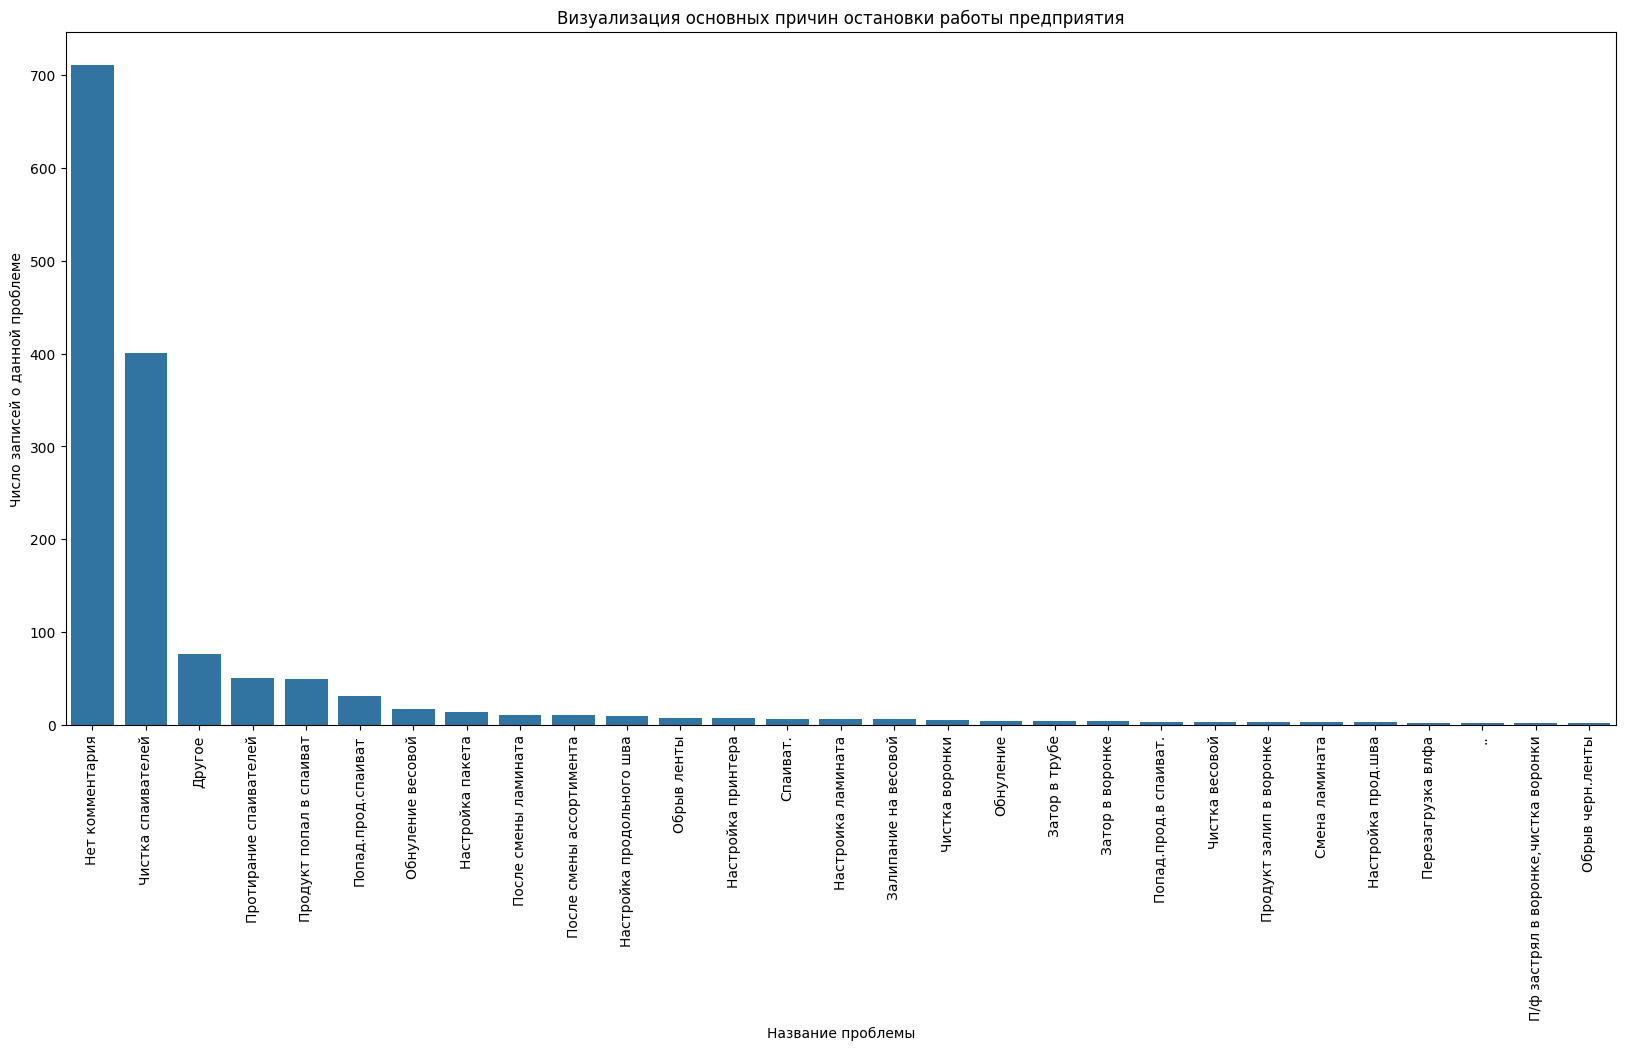

In [ ]:
fig, axes = plt.subplots(figsize=(20, 9));
sns.countplot(data3,
             x='Комментарий',
             order = data3['Комментарий'].value_counts().index.tolist(),
             stat = 'count',
             axes=axes);
axes.set_title('Визуализация основных причин остановки работы предприятия');
axes.set_xlabel('Название проблемы');
axes.set_ylabel('Число записей о данной проблеме');
axes.xaxis.set_tick_params(rotation=90);

In [ ]:
data3['Комментарий'].value_counts()

Нет комментария              711
Чистка спаивателей           401
Другое                       103
Протирание спаивателей        51
Продукт попал в спаиват       49
Попад.прод.спаиват            31
Обнуление весовой             17
Настройка пакета              14
После смены ламината          11
После смены ассортимента      11
Настройка продольного шва     10
Настройка принтера             7
Обрыв ленты                    7
Залипание на весовой           6
Спаиват.                       6
Настроика ламината             6
Чистка воронки                 5
Обнуление                      4
Затор в воронке                4
Name: Комментарий, dtype: int64